<a href="https://colab.research.google.com/github/PaulinaRuizB/Signal_Theory/blob/main/Taller_2_Autocorrelation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal Model and Stationarity Analysis

## 1. Cosine Signal

The original signal is constructed as a sum of cosine functions with different frequencies and amplitudes:

$$
x(t) = \sum_{i=1}^{k} A_i \cos(2 \pi f_i t)
$$

Where:

- $A_i$ is the amplitude of the $i$-th harmonic
- $f_i $ is the frequency of the $i$-th harmonic
- $ t $ is time
- $ k $ is the number of harmonic components

---

## 2. Additive White Gaussian Noise

To simulate a more realistic signal, white Gaussian noise is added:

$$
n(t) \sim \mathcal{N}(0, \sigma^2)
$$

The noisy signal becomes:

$$
x_{\text{noisy}}(t) = x(t) + n(t)
$$

---

## 3. Segment Statistics (Mean and Variance)

To analyze stationarity, the signal is divided into segments and we compute:

- The **mean** of each segment:

$$
\mu_s = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

- The **variance** of each segment:

$$
\sigma_s^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_s)^2
$$

Where:

- \( x_i \) is the sample value
- \( N \) is the number of samples in the segment
- \( \mu_s \) is the mean of the segment

---

## 4. Autocorrelation Function

The unbiased sample autocorrelation is calculated using:

$$
\hat{R}(k) = \frac{1}{N - |k|} \sum_{i=1}^{N - |k|} (x_i - \mu)(x_{i+k} - \mu)
$$

And it's normalized by the autocorrelation at lag 0:

$$
\hat{R}_n(k) = \frac{\hat{R}(k)}{\hat{R}(0)}
$$

Where:

- $\mu$ is the overall mean of the signal
- $ \hat{R}_n(k) $ is the normalized autocorrelation


#Promts:

- Generate a cosine signal with 3 harmonics, do it with 1024 samples
- Add a white gaussian noise to the code and make the sum with the cosine signal plus the gaussian noise
- Test the stationarity conditions and linear dependence for the resulting signal
- Make the results of the test in numerical form and make sure to analyze if the signal is stationary by evaluating the mean, variance and correlation on several segments of the signal.
- Integrate the first test I told you and the second one and print the cosine signal with its harmonics, the signals adding the noise and print the autocorrelation function of the sum of the signals.
- Mitigate the bias that can arise due to the limited estimation window.
- Fix the code to be organized in classes and functions and commented
- Make a python code with the exact same functions but with more methods of autocorrelation



#Sample Autocorrelation

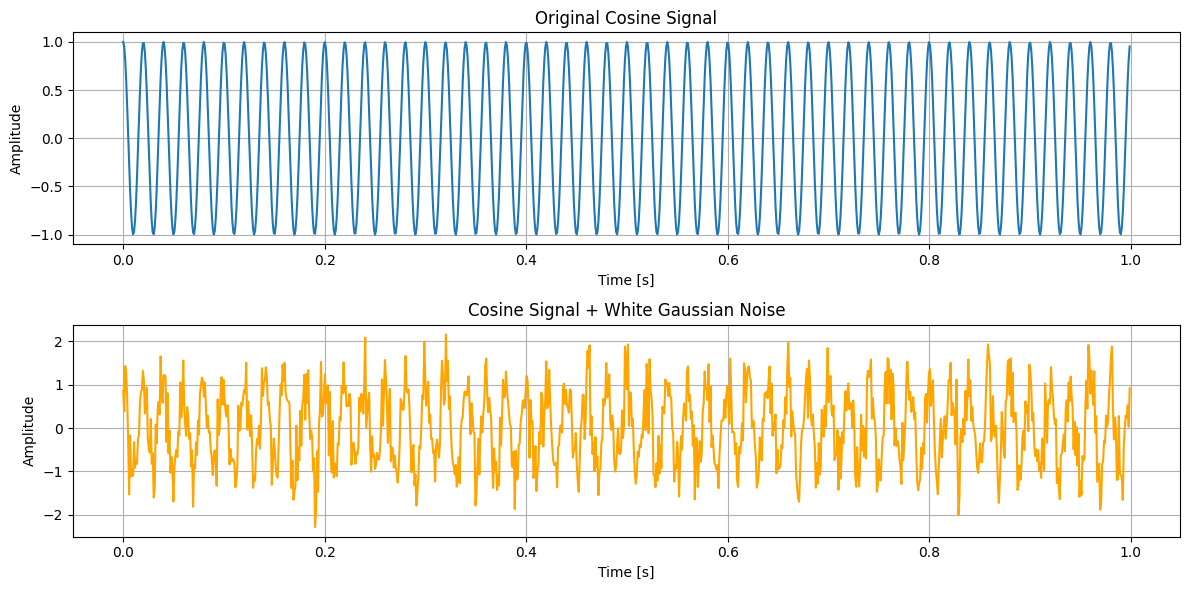


Segment-wise statistics:
----------------------------------------
Segment 1: Mean = 0.0215, Variance = 0.6956, Corr(lag=1) = 0.6568
Segment 2: Mean = 0.0054, Variance = 0.7174, Corr(lag=1) = 0.7254
Segment 3: Mean = 0.0405, Variance = 0.6922, Corr(lag=1) = 0.6719
Segment 4: Mean = 0.0178, Variance = 0.7577, Corr(lag=1) = 0.6967

Overall statistics:
----------------------------------------
Mean of means       = 0.0213 ± 0.0126
Mean of variances   = 0.7157 ± 0.0261
Mean of correlations= 0.6877 ± 0.0260

Conclusion:
Signal is approximately weak-sense stationary (mean and variance stable).
Correlation structure is stable (linear dependence stationary).

Augmented Dickey-Fuller Test:
----------------------------------------
ADF Statistic: -5.6372
p-value: 0.0000
Critical Values:
   1%: -3.437
   5%: -2.864
   10%: -2.568
The signal is likely stationary (reject the null hypothesis).


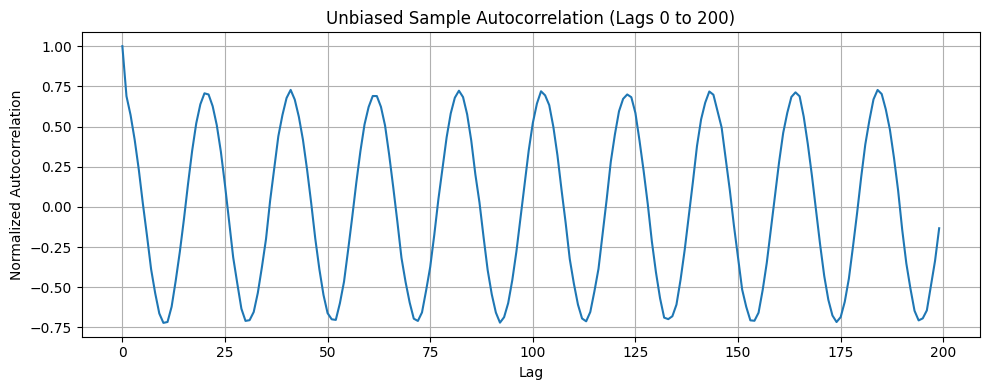


⏱️ Total execution time: 0.6315 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, correlation_lags
import time  # <-- Import the timer!
from statsmodels.tsa.stattools import adfuller  # <-- Import for ADF test

class CosineSignal:
    def __init__(self, N, sampling_frequency, frequencies, amplitudes, noise_power):
        """Initialize signal parameters."""
        self.N = N
        self.sampling_frequency = sampling_frequency
        self.frequencies = frequencies
        self.amplitudes = amplitudes
        self.noise_power = noise_power
        self.t = np.arange(N) / sampling_frequency
        self.signal = None
        self.noisy_signal = None

    def generate_signal(self):
        """Generate the base cosine signal with given harmonics."""
        self.signal = np.zeros(self.N) #Array with N samples
        for amp, freq in zip(self.amplitudes, self.frequencies): #Each amplitud has its own frequency
            self.signal += amp * np.cos(2 * np.pi * freq * self.t) #Add all the cosines with is harmonics

    def add_noise(self):
        """Add white Gaussian noise to the signal."""
        noise = np.random.normal(0, np.sqrt(self.noise_power), self.N)
        self.noisy_signal = self.signal + noise

    def plot_signals(self):
        """Plot the original and noisy signals."""
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(self.t, self.signal)
        plt.title("Original Cosine Signal")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(self.t, self.noisy_signal, color='orange')
        plt.title("Cosine Signal + White Gaussian Noise")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

"""Initialize the Stationary test"""
class StationarityTester:
    def __init__(self, signal, segment_length=256):
        """Initialize the tester with the signal and segment size."""
        self.signal = signal
        self.segment_length = segment_length
        self.N = len(signal)
        self.segments = self.N // self.segment_length
        self.means = []
        self.variances = []
        self.correlations = []

    def test_stationarity(self):
        """Calculate mean, variance, and correlation for each segment."""
        print("\nSegment-wise statistics:")
        print("-" * 40)
        for i in range(self.segments):
            seg = self.signal[i*self.segment_length:(i+1)*self.segment_length] #Divide the signal in segments to calculate, mean, variance and correlation for each one of them
            m = np.mean(seg)
            v = np.var(seg)
            corr = np.corrcoef(seg[:-1], seg[1:])[0, 1]
            self.means.append(m)
            self.variances.append(v)
            self.correlations.append(corr)
            print(f"Segment {i+1}: Mean = {m:.4f}, Variance = {v:.4f}, Corr(lag=1) = {corr:.4f}")

    def conclude_stationarity(self, threshold=0.1): #Low variability 10%        """Conclude stationarity based on variability of parameters."""
        mean_std = np.std(self.means)
        var_std = np.std(self.variances)
        corr_std = np.std(self.correlations)

        print("\nOverall statistics:")
        print("-" * 40)
        print(f"Mean of means       = {np.mean(self.means):.4f} ± {mean_std:.4f}")
        print(f"Mean of variances   = {np.mean(self.variances):.4f} ± {var_std:.4f}")
        print(f"Mean of correlations= {np.mean(self.correlations):.4f} ± {corr_std:.4f}")

        print("\nConclusion:")
        if mean_std < threshold and var_std < threshold:
            print("Signal is approximately weak-sense stationary (mean and variance stable).")
        else:
            print("Signal is not stationary (mean or variance varies across segments).")

        if corr_std < threshold:
            print("Correlation structure is stable (linear dependence stationary).")
        else:
            print("Correlation structure varies (non-stationary dependence).")

    def augmented_dickey_fuller_test(self):
        """Perform the Augmented Dickey-Fuller test for stationarity."""
        print("\nAugmented Dickey-Fuller Test:")
        print("-" * 40)
        result = adfuller(self.signal)
        adf_statistic, p_value, _, _, critical_values, _ = result

        print(f"ADF Statistic: {adf_statistic:.4f}")
        print(f"p-value: {p_value:.4f}")
        print("Critical Values:")
        for key, value in critical_values.items():
            print(f"   {key}: {value:.3f}")

        if p_value < 0.05:
            print("The signal is likely stationary (reject the null hypothesis).")
        else:
            print("The signal is likely non-stationary (fail to reject the null hypothesis).")

class AutocorrelationAnalyzer:
    def __init__(self, signal):
        """Initialize autocorrelation analyzer."""
        self.signal = signal
        self.N = len(signal)
        self.lags = None
        self.unbiased_autocorr = None

    def compute_unbiased_autocorrelation(self):
        """Compute unbiased sample autocorrelation."""
        normalized_signal = self.signal - np.mean(self.signal)

        raw_autocorr = correlate(normalized_signal, normalized_signal, mode='full')
        self.lags = correlation_lags(len(normalized_signal), len(normalized_signal), mode='full')
        self.unbiased_autocorr = raw_autocorr / (self.N - np.abs(self.lags))
        self.unbiased_autocorr /= self.unbiased_autocorr[self.N-1]  # Normalize at lag = 0 to make all the autocorrelations relatives to the signal energy

    def plot_autocorrelation(self, max_lag=200):
        """Plot autocorrelation from lag 0 to a given maximum lag."""
        start_idx = self.N-1  # lag=0 index
        positive_lags = self.lags[start_idx:start_idx+max_lag]
        positive_autocorr = self.unbiased_autocorr[start_idx:start_idx+max_lag]

        plt.figure(figsize=(10, 4))
        plt.plot(positive_lags, positive_autocorr)
        plt.title(f"Unbiased Sample Autocorrelation (Lags 0 to {max_lag})")
        plt.xlabel("Lag")
        plt.ylabel("Normalized Autocorrelation")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === MAIN PROGRAM ===
def main():
    start_time = time.time()  # Start the timer

    # --- Setup parameters ---
    N = 1024
    sampling_frequency = 1024
    frequencies = [50, 0, 0]
    amplitudes = [1.0, 0, 0]
    noise_power = 0.2

    # --- Generate signal ---
    my_signal = CosineSignal(N, sampling_frequency, frequencies, amplitudes, noise_power)
    my_signal.generate_signal()
    my_signal.add_noise()
    my_signal.plot_signals()

   # --- Test stationarity ---
    tester = StationarityTester(my_signal.noisy_signal)
    tester.test_stationarity()
    tester.conclude_stationarity()
    tester.augmented_dickey_fuller_test()  # <-- Call the new ADF test

    # --- Analyze autocorrelation ---
    analyzer = AutocorrelationAnalyzer(my_signal.noisy_signal)
    analyzer.compute_unbiased_autocorrelation()
    analyzer.plot_autocorrelation(max_lag=200)

    end_time = time.time()  # End the timer
    elapsed_time = end_time - start_time
    print(f"\n⏱️ Total execution time: {elapsed_time:.4f} seconds")

if __name__ == "__main__":
    main()


#Periodogram-Based Estimation

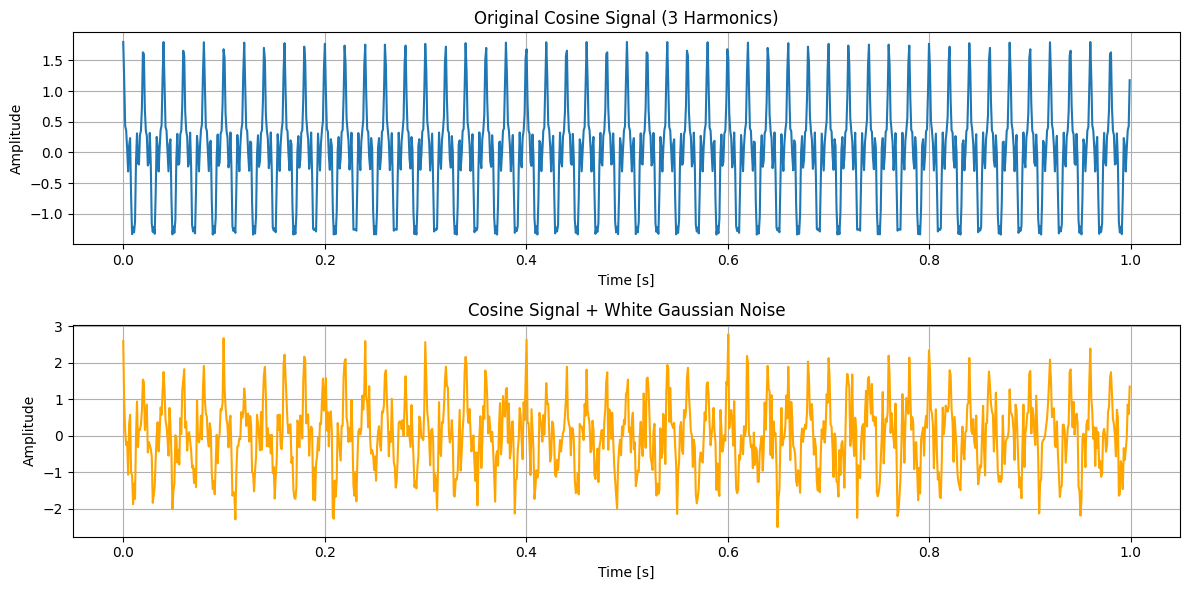

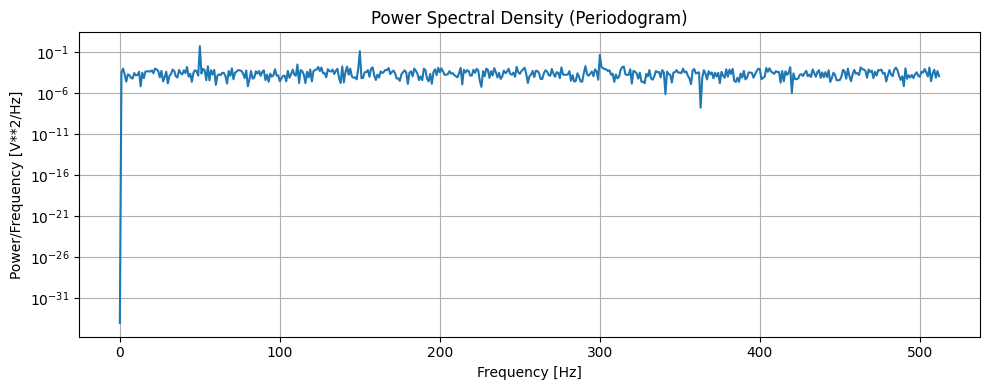


Segment-wise statistics:
----------------------------------------
Segment 1: Mean = 0.0229, Variance = 0.9653, Corr(lag=1) = 0.6799
Segment 2: Mean = 0.0075, Variance = 0.7932, Corr(lag=1) = 0.6408
Segment 3: Mean = -0.0043, Variance = 0.9359, Corr(lag=1) = 0.6121
Segment 4: Mean = 0.0339, Variance = 0.8968, Corr(lag=1) = 0.6551

Overall statistics:
----------------------------------------
Mean of means       = 0.0150 ± 0.0145
Mean of variances   = 0.8978 ± 0.0651
Mean of correlations= 0.6470 ± 0.0245

Conclusion:
Signal is approximately weak-sense stationary (mean and variance stable).
Correlation structure is stable (linear dependence stationary).

Augmented Dickey-Fuller Test:
----------------------------------------
ADF Statistic: -6.2060
p-value: 0.0000
Critical Values:
   1%: -3.437
   5%: -2.864
   10%: -2.568
The signal is likely stationary (reject the null hypothesis).

Total execution time: 0.7690 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from statsmodels.tsa.stattools import adfuller
import time

# === CosineSignal Class ===
#Initialize the necessary parameters to generate the signal and add th white Gaussian Noise
class CosineSignal:
    def __init__(self, N, sampling_frequency, frequencies, amplitudes, noise_power):
        self.N = N
        self.sampling_frequency = sampling_frequency
        self.frequencies = frequencies
        self.amplitudes = amplitudes
        self.noise_power = noise_power
        self.t = np.arange(N) / sampling_frequency
        self.signal = None
        self.noisy_signal = None

    #Generate the cosine signal
    def generate_signal(self):
        self.signal = np.zeros(self.N) #Array with N samples
        for amp, freq in zip(self.amplitudes, self.frequencies): #Amplitudes with ist respect frequency
            self.signal += amp * np.cos(2 * np.pi * freq * self.t) #Add each cosine

    #Add White Gaussian Noise to the signal
    def add_noise(self):
        noise = np.random.normal(0, np.sqrt(self.noise_power), self.N)
        self.noisy_signal = self.signal + noise

    #Plot the origina signal and the signal with noise
    def plot_signals(self):
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(self.t, self.signal)
        plt.title("Original Cosine Signal (3 Harmonics)")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(self.t, self.noisy_signal, color='orange')
        plt.title("Cosine Signal + White Gaussian Noise")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# === Periodogram-Based Estimation Class ===
#Estimation of the PSD (power spectral density)
class PeriodogramEstimator:
    def __init__(self, signal, fs):
        self.signal = signal
        self.fs = fs
        self.frequencies = None
        self.psd = None

    def compute_periodogram(self): #frequency vs power
        self.frequencies, self.psd = periodogram(self.signal, fs=self.fs)

    def plot_periodogram(self):
        plt.figure(figsize=(10, 4))
        plt.semilogy(self.frequencies, self.psd)
        plt.title("Power Spectral Density (Periodogram)")
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Power/Frequency [V**2/Hz]")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Stationarity Tester ===
class StationarityTester:
    def __init__(self, signal, segment_length=256):
        self.signal = signal
        self.segment_length = segment_length
        self.N = len(signal)
        self.segments = self.N // self.segment_length
        self.means = []
        self.variances = []
        self.correlations = []

    def test_stationarity(self):
        print("\nSegment-wise statistics:")
        print("-" * 40)
        for i in range(self.segments):
            seg = self.signal[i*self.segment_length:(i+1)*self.segment_length]
            m = np.mean(seg)
            v = np.var(seg)
            corr = np.corrcoef(seg[:-1], seg[1:])[0, 1]
            self.means.append(m)
            self.variances.append(v)
            self.correlations.append(corr)
            print(f"Segment {i+1}: Mean = {m:.4f}, Variance = {v:.4f}, Corr(lag=1) = {corr:.4f}")

    def conclude_stationarity(self, threshold=0.1):
        mean_std = np.std(self.means)
        var_std = np.std(self.variances)
        corr_std = np.std(self.correlations)

        print("\nOverall statistics:")
        print("-" * 40)
        print(f"Mean of means       = {np.mean(self.means):.4f} ± {mean_std:.4f}")
        print(f"Mean of variances   = {np.mean(self.variances):.4f} ± {var_std:.4f}")
        print(f"Mean of correlations= {np.mean(self.correlations):.4f} ± {corr_std:.4f}")

        print("\nConclusion:")
        if mean_std < threshold and var_std < threshold:
            print("Signal is approximately weak-sense stationary (mean and variance stable).")
        else:
            print("Signal is not stationary (mean or variance varies across segments).")

        if corr_std < threshold:
            print("Correlation structure is stable (linear dependence stationary).")
        else:
            print("Correlation structure varies (non-stationary dependence).")

    def augmented_dickey_fuller_test(self):
        print("\nAugmented Dickey-Fuller Test:")
        print("-" * 40)
        result = adfuller(self.signal)
        adf_statistic, p_value, _, _, critical_values, _ = result

        print(f"ADF Statistic: {adf_statistic:.4f}")
        print(f"p-value: {p_value:.4f}")
        print("Critical Values:")
        for key, value in critical_values.items():
            print(f"   {key}: {value:.3f}")

        if p_value < 0.05:
            print("The signal is likely stationary (reject the null hypothesis).")
        else:
            print("The signal is likely non-stationary (fail to reject the null hypothesis).")

# === Main Function ===
def main():
    start_time = time.time()

    # Parameters
    N = 1024
    sampling_frequency = 1024
    frequencies = [50, 150, 300]
    amplitudes = [1.0, 0.5, 0.3]
    noise_power = 0.2

    # Generate and plot signal
    signal = CosineSignal(N, sampling_frequency, frequencies, amplitudes, noise_power)
    signal.generate_signal()
    signal.add_noise()
    signal.plot_signals()

    # Periodogram analysis
    periodogram_estimator = PeriodogramEstimator(signal.noisy_signal, sampling_frequency)
    periodogram_estimator.compute_periodogram()
    periodogram_estimator.plot_periodogram()

    # Stationarity analysis
    tester = StationarityTester(signal.noisy_signal)
    tester.test_stationarity()
    tester.conclude_stationarity()
    tester.augmented_dickey_fuller_test()

    end_time = time.time()
    print("\nTotal execution time: {:.4f} seconds".format(end_time - start_time))

main()


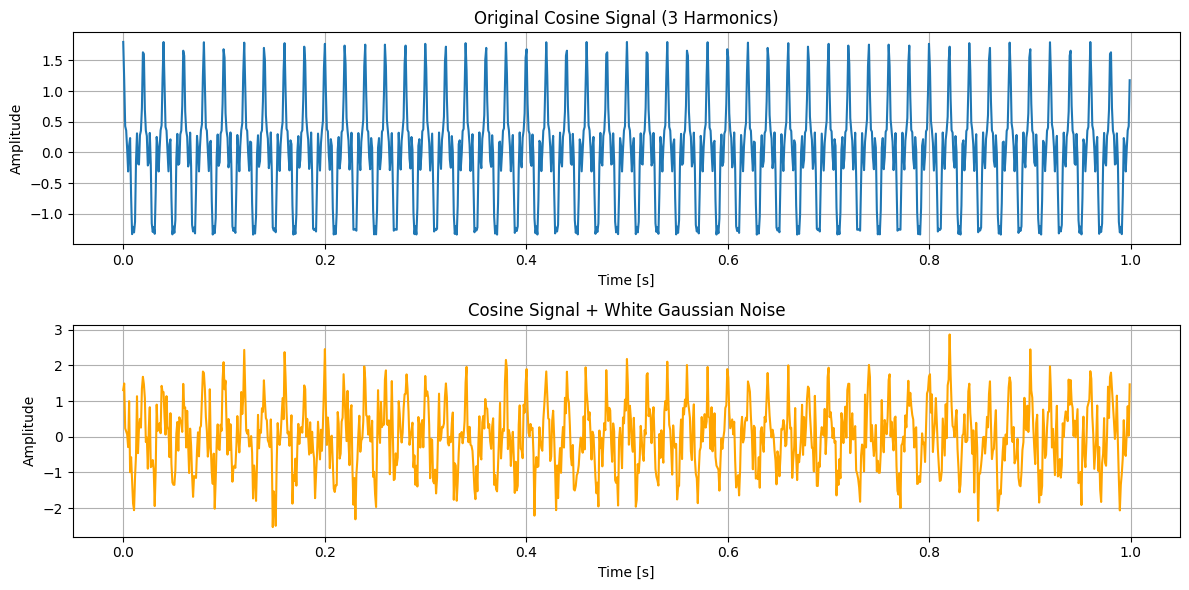


MLE Estimation Results:
----------------------------------------
Estimated Amplitude: 0.9809
Estimated Frequency: 50.0002 Hz
Estimated Noise Std: 0.6090

Segment-wise statistics:
----------------------------------------
Segment 1: Mean = -0.0128, Variance = 0.9040, Corr(lag=1) = 0.6168
Segment 2: Mean = -0.0315, Variance = 0.8350, Corr(lag=1) = 0.6093
Segment 3: Mean = 0.0226, Variance = 0.7650, Corr(lag=1) = 0.5967
Segment 4: Mean = 0.0184, Variance = 0.9020, Corr(lag=1) = 0.6428

Overall statistics:
----------------------------------------
Mean of means       = -0.0008 ± 0.0224
Mean of variances   = 0.8515 ± 0.0571
Mean of correlations= 0.6164 ± 0.0168

Conclusion:
Signal is approximately weak-sense stationary (mean and variance stable).
Correlation structure is stable (linear dependence stationary).

Augmented Dickey-Fuller Test:
----------------------------------------
ADF Statistic: -4.8782
p-value: 0.0000
Critical Values:
   1%: -3.437
   5%: -2.864
   10%: -2.568
The signal is 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy.optimize import minimize
import time

# === CosineSignal Class ===
class CosineSignal:
    def __init__(self, N, sampling_frequency, frequencies, amplitudes, noise_power):
        self.N = N
        self.sampling_frequency = sampling_frequency
        self.frequencies = frequencies
        self.amplitudes = amplitudes
        self.noise_power = noise_power
        self.t = np.arange(N) / sampling_frequency
        self.signal = None
        self.noisy_signal = None

    def generate_signal(self):
        self.signal = np.zeros(self.N)
        for amp, freq in zip(self.amplitudes, self.frequencies):
            self.signal += amp * np.cos(2 * np.pi * freq * self.t)

    def add_noise(self):
        noise = np.random.normal(0, np.sqrt(self.noise_power), self.N)
        self.noisy_signal = self.signal + noise

    def plot_signals(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(self.t, self.signal)
        plt.title("Original Cosine Signal (3 Harmonics)")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(self.t, self.noisy_signal, color='orange')
        plt.title("Cosine Signal + White Gaussian Noise")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# === MLE Estimator Class ===
class MLEEstimator:
    def __init__(self, signal, t):
        self.signal = signal
        self.t = t

    def log_likelihood(self, params):
        amp, freq, sigma = params
        model = amp * np.cos(2 * np.pi * freq * self.t)
        residual = self.signal - model
        N = len(self.signal)
        ll = -0.5 * N * np.log(2 * np.pi * sigma**2) - (np.sum(residual**2) / (2 * sigma**2))
        return -ll  # Negative log-likelihood for minimization

    def estimate(self, initial_guess=[1.0, 50.0, 0.5]):
        result = minimize(self.log_likelihood, initial_guess, method='L-BFGS-B',
                          bounds=[(0, None), (0, 512), (1e-6, None)])
        return result.x

# === Stationarity Tester ===
class StationarityTester:
    def __init__(self, signal, segment_length=256):
        self.signal = signal
        self.segment_length = segment_length
        self.N = len(signal)
        self.segments = self.N // self.segment_length
        self.means = []
        self.variances = []
        self.correlations = []

    def test_stationarity(self):
        print("\nSegment-wise statistics:")
        print("-" * 40)
        for i in range(self.segments):
            seg = self.signal[i*self.segment_length:(i+1)*self.segment_length]
            m = np.mean(seg)
            v = np.var(seg)
            corr = np.corrcoef(seg[:-1], seg[1:])[0, 1]
            self.means.append(m)
            self.variances.append(v)
            self.correlations.append(corr)
            print(f"Segment {i+1}: Mean = {m:.4f}, Variance = {v:.4f}, Corr(lag=1) = {corr:.4f}")

    def conclude_stationarity(self, threshold=0.1):
        mean_std = np.std(self.means)
        var_std = np.std(self.variances)
        corr_std = np.std(self.correlations)

        print("\nOverall statistics:")
        print("-" * 40)
        print(f"Mean of means       = {np.mean(self.means):.4f} ± {mean_std:.4f}")
        print(f"Mean of variances   = {np.mean(self.variances):.4f} ± {var_std:.4f}")
        print(f"Mean of correlations= {np.mean(self.correlations):.4f} ± {corr_std:.4f}")

        print("\nConclusion:")
        if mean_std < threshold and var_std < threshold:
            print("Signal is approximately weak-sense stationary (mean and variance stable).")
        else:
            print("Signal is not stationary (mean or variance varies across segments).")

        if corr_std < threshold:
            print("Correlation structure is stable (linear dependence stationary).")
        else:
            print("Correlation structure varies (non-stationary dependence).")

    def augmented_dickey_fuller_test(self):
        print("\nAugmented Dickey-Fuller Test:")
        print("-" * 40)
        result = adfuller(self.signal)
        adf_statistic, p_value, _, _, critical_values, _ = result

        print(f"ADF Statistic: {adf_statistic:.4f}")
        print(f"p-value: {p_value:.4f}")
        print("Critical Values:")
        for key, value in critical_values.items():
            print(f"   {key}: {value:.3f}")

        if p_value < 0.05:
            print("The signal is likely stationary (reject the null hypothesis).")
        else:
            print("The signal is likely non-stationary (fail to reject the null hypothesis).")

# === Main Function ===
def main():
    start_time = time.time()

    # Parameters
    N = 1024
    sampling_frequency = 1024
    frequencies = [50, 150, 300]
    amplitudes = [1.0, 0.5, 0.3]
    noise_power = 0.2

    # Generate and plot signal
    signal = CosineSignal(N, sampling_frequency, frequencies, amplitudes, noise_power)
    signal.generate_signal()
    signal.add_noise()
    signal.plot_signals()

    # MLE estimation for one frequency component (simplified model)
    mle = MLEEstimator(signal.noisy_signal, signal.t)
    amp_est, freq_est, sigma_est = mle.estimate()
    print("\nMLE Estimation Results:")
    print("-" * 40)
    print(f"Estimated Amplitude: {amp_est:.4f}")
    print(f"Estimated Frequency: {freq_est:.4f} Hz")
    print(f"Estimated Noise Std: {sigma_est:.4f}")

    # Stationarity analysis
    tester = StationarityTester(signal.noisy_signal)
    tester.test_stationarity()
    tester.conclude_stationarity()
    tester.augmented_dickey_fuller_test()

    end_time = time.time()
    print("\nTotal execution time: {:.4f} seconds".format(end_time - start_time))

main()
